This code generates the data points X by multiplying two randomly generated non-negative matrices U and V. The resulting data points will lie on a single hyperplane within the non-negative 3D space.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools

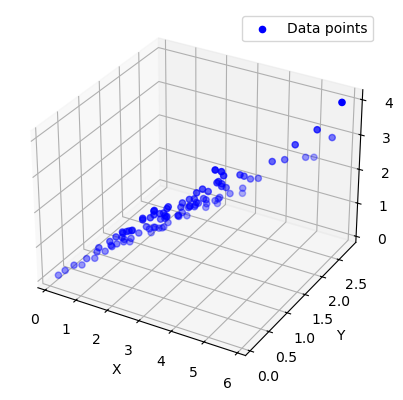

In [2]:
m = 3
n = 100
r = 2

U = np.abs(np.random.randn(m, r))
V = np.abs(np.random.randn(r, n))
X = U @ V # @ is used for matrix multiplication

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[0], X[1], X[2], c='b', marker='o', label='Data points')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

In [3]:
#OLD VERSION OF CODE
# def cone_collapsing(X, r, theta, max_iter):
#     m, n = X.shape
#     U = np.eye(m)[:, :r]  # Initialize U with the first r unit vectors
#     V = np.zeros((r, n))  # Initialize V as a zero matrix

#     for t in range(max_iter):
#         for i in range(r):
#             ui = U[:, i]
#             mu = np.mean(X, axis=1)  # Center towards the mean of all data points
#             mu_hat = np.dot(ui, mu) * ui  # Projection of mu onto span(ui)
#             mu_perp = mu - mu_hat  # Residual

#             if np.linalg.norm(mu_perp) > 1e-10:  # Check if mu_perp is not close to zero
#                 ui_prime = mu_hat + np.linalg.norm(mu_hat) * np.tan(theta) * mu_perp / np.linalg.norm(mu_perp)
#             else:
#                 ui_prime = mu_hat

#             U_temp = U.copy()
#             U_temp[:, i] = ui_prime / np.linalg.norm(ui_prime)

#             if not np.all(np.dot(U_temp.T, X) >= 0):
#                 # If a point falls out of the cone, return the current U and the index of the point
#                 point_idx = np.argmin(np.dot(U_temp.T, X))
#                 return U, point_idx

#             U = U_temp

#     return U, None

# # Run the CC algorithm
# theta = np.pi / 12  # Step size parameter
# max_iter = 1000  # Maximum number of iterations

# U, point_idx = cone_collapsing(X, r, theta, max_iter)

#Simplified Version that seems to work
def cone_collapsing(U, X):
    while True:
        for i in range(X.shape[1]):
            x = X[:, i]
            v = np.linalg.lstsq(U, x, rcond=None)[0]
            if np.any(v < 0):
                return U, x

        # Move vertex rays towards the center of the nonnegative orthant
        U = (U + np.mean(U, axis=1, keepdims=True)) / 2

U_new, x_out = cone_collapsing(U, X)

In [4]:
# OLD VERSION OF CODE
# if point_idx is not None:
#     # Add the vector containing the point to U
#     point_vector = X[:, point_idx]
#     U_extended = np.hstack((U, point_vector.reshape(-1, 1)))

#     # Calculate the pseudo-inverse
#     U_pinv = np.linalg.pinv(U_extended)

#     # Check if any point results in a negative value using the pseudo-inverse
#     V_pinv = np.dot(U_pinv, X)

#     if np.any(V_pinv < 0):
#         print("Pseudo-inverse check: Point falls out of the cone.")
#     else:
#         print("Pseudo-inverse check: Point does not fall out of the cone.")

#     # Combinatorial test (100% accuracy)
#     combinations = list(itertools.combinations(range(U_extended.shape[1]), 3))
#     falls_out = False
#     for comb in combinations:
#         U_prime = U_extended[:, comb]
#         V_prime = np.linalg.solve(np.dot(U_prime.T, U_prime), np.dot(U_prime.T, X))
#         if np.all(V_prime >= 0):
#             falls_out = True
#             break

#     if falls_out:
#         print("Combinatorial test: Point falls out of the cone.")
#     else:
#         print("Combinatorial test: Point does not fall out of the cone.")
# else:
#     print("No point fell out of the cone during the CC algorithm.")

#Simplified Version that seems to work
def pseudo_inverse_test(U, x):
    U_new = np.hstack((U, x.reshape(-1, 1)))
    v = np.linalg.pinv(U_new.T @ U_new) @ U_new.T @ x
    return np.any(v < 0)

def combinatorial_test(U, x):
    m, n = U.shape
    for indices in itertools.combinations(range(n), m-1):
        U_subset = U[:, indices]
        v = np.linalg.solve(U_subset.T @ U_subset, U_subset.T @ x)
        if np.all(v >= 0):
            return True
    return False

# Check if the point falls out of the cone using the pseudo-inverse test
if pseudo_inverse_test(U_new, x_out):
    print("Point falls out of the cone according to the pseudo-inverse test.")

    # Verify using the combinatorial test
    if combinatorial_test(U_new, x_out):
        print("Point actually falls within the cone according to the combinatorial test.")
    else:
        print("Point falls out of the cone according to the combinatorial test.")
else:
    print("Point falls within the cone according to the pseudo-inverse test.")

Point falls out of the cone according to the pseudo-inverse test.
Point falls out of the cone according to the combinatorial test.
